<a href="https://colab.research.google.com/github/vatsj/dlm/blob/main/soft_prompts_addition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install git+https://github.com/neelnanda-io/TransformerLens

In [2]:
import torch 
import numpy as np

from transformer_lens import HookedTransformer
import transformer_lens.utils as utils

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = HookedTransformer.from_pretrained("gpt2-large", device=device)
# Also tested it with gpt2-small -> wasn't able to do the calculation in the first place 

Using pad_token, but it is not set yet.


Loaded pretrained model gpt2-large into HookedTransformer


In [4]:
def get_top_predictions(tensor):
    probabilities = torch.nn.functional.softmax(tensor, dim=-1)
    
    top_probabilities, top_indexes = torch.topk(probabilities, k=10, dim=-1)
    
    # Print the top 10 indexes with their probabilities
    for prob, idx in zip(top_probabilities[0, -1], top_indexes[0, -1]):
        print(f"Token: {model.tokenizer.decode(idx)} \t-\t Probability: {prob*100:0.2f}")


In [5]:
s1 = """I am happy. I am happy.
I am sad. I am sad.
I am sad. I am sad.
I am happy. I am happy.
I am sad. I am sad.
I am happy. I am happy.
I am happy. I am happy.
I am happy. I am happy.
I am happy. I am happy.
I am sad. I am sad.
I am happy. I am"""
s2 = """I am happy. I am happy.
I am sad. I am sad.
I am sad. I am sad.
I am happy. I am happy.
I am sad. I am sad.
I am happy. I am happy.
I am happy. I am happy.
I am happy. I am happy.
I am happy. I am happy.
I am sad. I am sad.
I am sad. I am"""

print(model.generate(s1))
print(model.generate(s2))

  0%|          | 0/10 [00:00<?, ?it/s]

I am happy. I am happy.
I am sad. I am sad.
I am sad. I am sad.
I am happy. I am happy.
I am sad. I am sad.
I am happy. I am happy.
I am happy. I am happy.
I am happy. I am happy.
I am happy. I am happy.
I am sad. I am sad.
I am happy. I am happy.
I am happy. I am happy


  0%|          | 0/10 [00:00<?, ?it/s]

I am happy. I am happy.
I am sad. I am sad.
I am sad. I am sad.
I am happy. I am happy.
I am sad. I am sad.
I am happy. I am happy.
I am happy. I am happy.
I am happy. I am happy.
I am happy. I am happy.
I am sad. I am sad.
I am sad. I am sad.
I am sad. I am sad


In [6]:
t1 = model.tokenizer.encode(s1)
t2 = model.tokenizer.encode(s2)
print(t1, t2)
emb1, emb2 = model.embed(t1), model.embed(t2)

[40, 716, 3772, 13, 314, 716, 3772, 13, 198, 40, 716, 6507, 13, 314, 716, 6507, 13, 198, 40, 716, 6507, 13, 314, 716, 6507, 13, 198, 40, 716, 3772, 13, 314, 716, 3772, 13, 198, 40, 716, 6507, 13, 314, 716, 6507, 13, 198, 40, 716, 3772, 13, 314, 716, 3772, 13, 198, 40, 716, 3772, 13, 314, 716, 3772, 13, 198, 40, 716, 3772, 13, 314, 716, 3772, 13, 198, 40, 716, 3772, 13, 314, 716, 3772, 13, 198, 40, 716, 6507, 13, 314, 716, 6507, 13, 198, 40, 716, 3772, 13, 314, 716] [40, 716, 3772, 13, 314, 716, 3772, 13, 198, 40, 716, 6507, 13, 314, 716, 6507, 13, 198, 40, 716, 6507, 13, 314, 716, 6507, 13, 198, 40, 716, 3772, 13, 314, 716, 3772, 13, 198, 40, 716, 6507, 13, 314, 716, 6507, 13, 198, 40, 716, 3772, 13, 314, 716, 3772, 13, 198, 40, 716, 3772, 13, 314, 716, 3772, 13, 198, 40, 716, 3772, 13, 314, 716, 3772, 13, 198, 40, 716, 3772, 13, 314, 716, 3772, 13, 198, 40, 716, 6507, 13, 314, 716, 6507, 13, 198, 40, 716, 6507, 13, 314, 716]


In [7]:
print("#", s1)
ex1 = model(s1)
get_top_predictions(ex1)
print("\n#", s2)
get_top_predictions(model(s2))
# At least 10+1 works? Tried a few differnt prompts but doesn't seem it to work robustly 
# JACOB: found one that does; used NL task ("I am happy. I am happy.") + prompt examples

# I am happy. I am happy.
I am sad. I am sad.
I am sad. I am sad.
I am happy. I am happy.
I am sad. I am sad.
I am happy. I am happy.
I am happy. I am happy.
I am happy. I am happy.
I am happy. I am happy.
I am sad. I am sad.
I am happy. I am
Token:  happy 	-	 Probability: 99.45
Token:  sad 	-	 Probability: 0.28
Token:  glad 	-	 Probability: 0.03
Token:  Happy 	-	 Probability: 0.02
Token:  happiness 	-	 Probability: 0.02
Token: 
 	-	 Probability: 0.01
Token:  good 	-	 Probability: 0.01
Token:  sorry 	-	 Probability: 0.01
Token:  proud 	-	 Probability: 0.01
Token:  unhappy 	-	 Probability: 0.01

# I am happy. I am happy.
I am sad. I am sad.
I am sad. I am sad.
I am happy. I am happy.
I am sad. I am sad.
I am happy. I am happy.
I am happy. I am happy.
I am happy. I am happy.
I am happy. I am happy.
I am sad. I am sad.
I am sad. I am
Token:  sad 	-	 Probability: 99.61
Token:  sorry 	-	 Probability: 0.06
Token:  sadness 	-	 Probability: 0.06
Token:  happy 	-	 Probability: 0.05
Token: 
 	-	

In [8]:
def ablation_hook(value, hook):
    print(value.shape)
    value[:, 1:, :] = 0.
    return value

# This is only my best guess how run_with_hooks works
ex2 = model.run_with_hooks(
    s2, 
    fwd_hooks=[(
        utils.get_act_name("embed"), 
        ablation_hook
        )]
    )

get_top_predictions(ex2)

torch.Size([1, 97, 1280])
Token: cery 	-	 Probability: 2.89
Token: oup 	-	 Probability: 2.87
Token: ā 	-	 Probability: 2.71
Token: ana 	-	 Probability: 2.49
Token: pet 	-	 Probability: 2.26
Token: mber 	-	 Probability: 1.98
Token: tml 	-	 Probability: 1.83
Token: ​ 	-	 Probability: 1.55
Token: aria 	-	 Probability: 1.41
Token: oen 	-	 Probability: 1.41


In [9]:
def soft_prompt_hook(value, hook):
    # Why this indexing here? I don't know where the extra dimension is coming from so I assume its a specialized start token 
    value[:, 1:, :] = emb1
    return value


ex3 = model.run_with_hooks(
    s1, 
    fwd_hooks=[(
        utils.get_act_name("embed"), 
        soft_prompt_hook
        )]
    )

get_top_predictions(ex3)
# sanity check, same as before
# also confirms weird indexing in hook

Token:  happy 	-	 Probability: 99.45
Token:  sad 	-	 Probability: 0.28
Token:  glad 	-	 Probability: 0.03
Token:  Happy 	-	 Probability: 0.02
Token:  happiness 	-	 Probability: 0.02
Token: 
 	-	 Probability: 0.01
Token:  good 	-	 Probability: 0.01
Token:  sorry 	-	 Probability: 0.01
Token:  proud 	-	 Probability: 0.01
Token:  unhappy 	-	 Probability: 0.01


So probability over the relevant tokens {11,12} is def not the same - 12%, 6% respectively 


In [10]:
# weight for embedding 1
we1 = 0.555
mix_emb = we1*emb1 + (1 - we1)*emb2

def soft_prompt_hook(value, hook):
    value[:, 1:, :] = mix_emb
    return value

ex4 = model.run_with_hooks(
    s1, 
    fwd_hooks=[(
        utils.get_act_name("embed"), 
        soft_prompt_hook
        )]
    )
get_top_predictions(ex4)


Token:  happy 	-	 Probability: 51.37
Token:  sad 	-	 Probability: 47.82
Token:  sorry 	-	 Probability: 0.15
Token:  glad 	-	 Probability: 0.11
Token:  unhappy 	-	 Probability: 0.04
Token:  mad 	-	 Probability: 0.03
Token: 
 	-	 Probability: 0.03
Token:  a 	-	 Probability: 0.02
Token:  good 	-	 Probability: 0.02
Token:  sadness 	-	 Probability: 0.02


In [14]:
tensor = ex4


In [15]:
# top_indexes.shape
target_prob

tensor(0.5137, grad_fn=<SelectBackward0>)

In [28]:
# we1 -> Pr[happy]
def pr(we1):
    mix_emb = we1*emb1 + (1 - we1)*emb2

    def soft_prompt_hook(value, hook):
        value[:, 1:, :] = mix_emb
        return value

    ex0 = model.run_with_hooks(
        s1, 
        fwd_hooks=[(
            utils.get_act_name("embed"), 
            soft_prompt_hook
            )]
        )
    tensor = ex0

    probabilities = torch.nn.functional.softmax(tensor, dim=-1)

    top_probabilities, top_indexes = torch.topk(probabilities, k=10, dim=-1)

    top_tokens = [model.tokenizer.decode(idx) for idx in top_indexes[0, -1]]
    top_token_probs = top_probabilities[0, -1].cpu().detach().numpy()

    # gets probability of "happy" token
    TARGET_TOKEN = " happy"
    target_idx = model.tokenizer.encode(TARGET_TOKEN)[0]
    target_ind = top_tokens.index(TARGET_TOKEN)
    target_prob = top_probabilities[0, -1, target_ind]

    # returns target_prob as scalar
    return target_prob.item()

  

In [38]:
# breakeven prob
# jumps to [0, 1] outside this (narrow) range
pr(0.555)

0.513670802116394

In [34]:
# imports
import matplotlib.pyplot as plt
import numpy as np

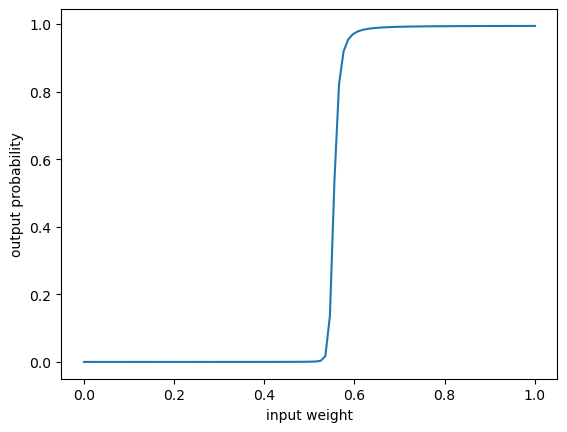

In [37]:
# graphs pr function
x = np.linspace(0, 1, 100)
y = [pr(i) for i in x]

# labels axes
plt.xlabel("input weight")
plt.ylabel("output probability")

# plots graph
plt.plot(x, y)